In [ ]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
import tensorflow as tf
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset From Kaggle

In [ ]:
#Install Kaggle
!pip install kaggle

In [ ]:
#Upload you API token kaggle.json:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aunkonhabib","key":"2d3e7b51eb26e556a68b34641794c92b"}'}

In [ ]:
#Create a directory kaggle
!mkdir ~/.kaggle

In [ ]:
#Copy kaggle.json file
!cp kaggle.json ~/.kaggle/

In [ ]:
#Grant Permissions
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# download dataset
! kaggle datasets download  masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0


In [ ]:
!unzip brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

# Load Train Data

In [ ]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df


In [ ]:
tr_df = train_df('/content/Training')
tr_df

,Class Path,Class
0,/content/Training/meningioma/Tr-me_0643.jpg,meningioma
1,/content/Training/meningioma/Tr-me_1021.jpg,meningioma
2,/content/Training/meningioma/Tr-me_1208.jpg,meningioma
3,/content/Training/meningioma/Tr-me_0868.jpg,meningioma
4,/content/Training/meningioma/Tr-me_0315.jpg,meningioma
...,...,...
5707,/content/Training/pituitary/Tr-pi_0169.jpg,pituitary
5708,/content/Training/pituitary/Tr-pi_1210.jpg,pituitary
5709,/content/Training/pituitary/Tr-pi_0088.jpg,pituitary
5710,/content/Training/pituitary/Tr-pi_1266.jpg,pituitary


# Load Test Data

---



In [ ]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [ ]:
ts_df = test_df('/content/Testing')
ts_df

,Class Path,Class
0,/content/Testing/meningioma/Te-me_0151.jpg,meningioma
1,/content/Testing/meningioma/Te-me_0100.jpg,meningioma
2,/content/Testing/meningioma/Te-me_0064.jpg,meningioma
3,/content/Testing/meningioma/Te-me_0084.jpg,meningioma
4,/content/Testing/meningioma/Te-me_0223.jpg,meningioma
...,...,...
1306,/content/Testing/pituitary/Te-pi_0152.jpg,pituitary
1307,/content/Testing/pituitary/Te-pi_0252.jpg,pituitary
1308,/content/Testing/pituitary/Te-pi_0228.jpg,pituitary
1309,/content/Testing/pituitary/Te-pi_0104.jpg,pituitary


# Number of images in each class in train data

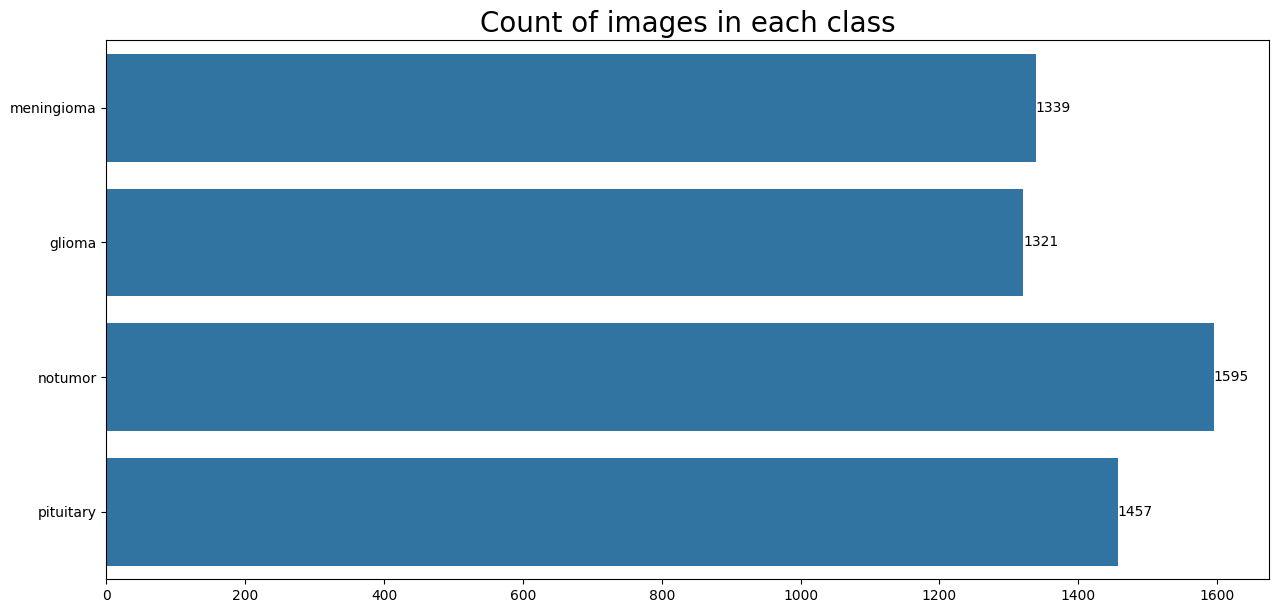

In [ ]:

plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

# Count each class in test data

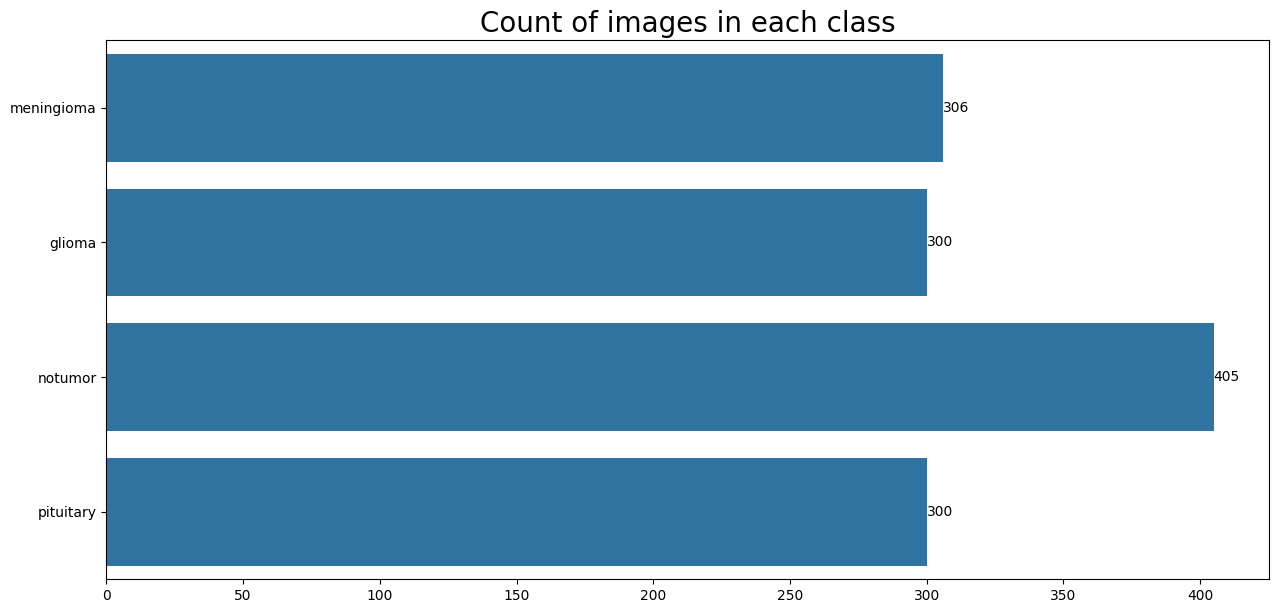

In [ ]:

plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df , y=ts_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

#  Split data into train, test, valid

In [ ]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])
valid_df

,Class Path,Class
592,/content/Testing/glioma/Te-gl_0040.jpg,glioma
18,/content/Testing/meningioma/Te-me_0030.jpg,meningioma
1072,/content/Testing/pituitary/Te-pi_0251.jpg,pituitary
73,/content/Testing/meningioma/Te-me_0191.jpg,meningioma
415,/content/Testing/glioma/Te-gl_0194.jpg,glioma
...,...,...
365,/content/Testing/glioma/Te-gl_0076.jpg,glioma
860,/content/Testing/notumor/Te-no_0231.jpg,notumor
579,/content/Testing/glioma/Te-gl_0223.jpg,glioma
194,/content/Testing/meningioma/Te-me_0251.jpg,meningioma


# Data preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg19 import preprocess_input

batch_size = 32
img_size = (299, 299)
seed = 42

# Augmentation for training
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    fill_mode='nearest'
)

# No augmentation for validation and test, only preprocessing
test_val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Train generator
tr_gen = train_datagen.flow_from_dataframe(
    dataframe=tr_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    seed=seed
)

# Validation generator
valid_gen = test_val_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=seed
)

# Test generator
ts_gen = test_val_datagen.flow_from_dataframe(
    dataframe=ts_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=16,
    class_mode='categorical',
    shuffle=False,
    seed=seed
)

#Pring class mapings
print("Class indices:", tr_gen.class_indices)


Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.
Class indices: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


# Getting samples from data

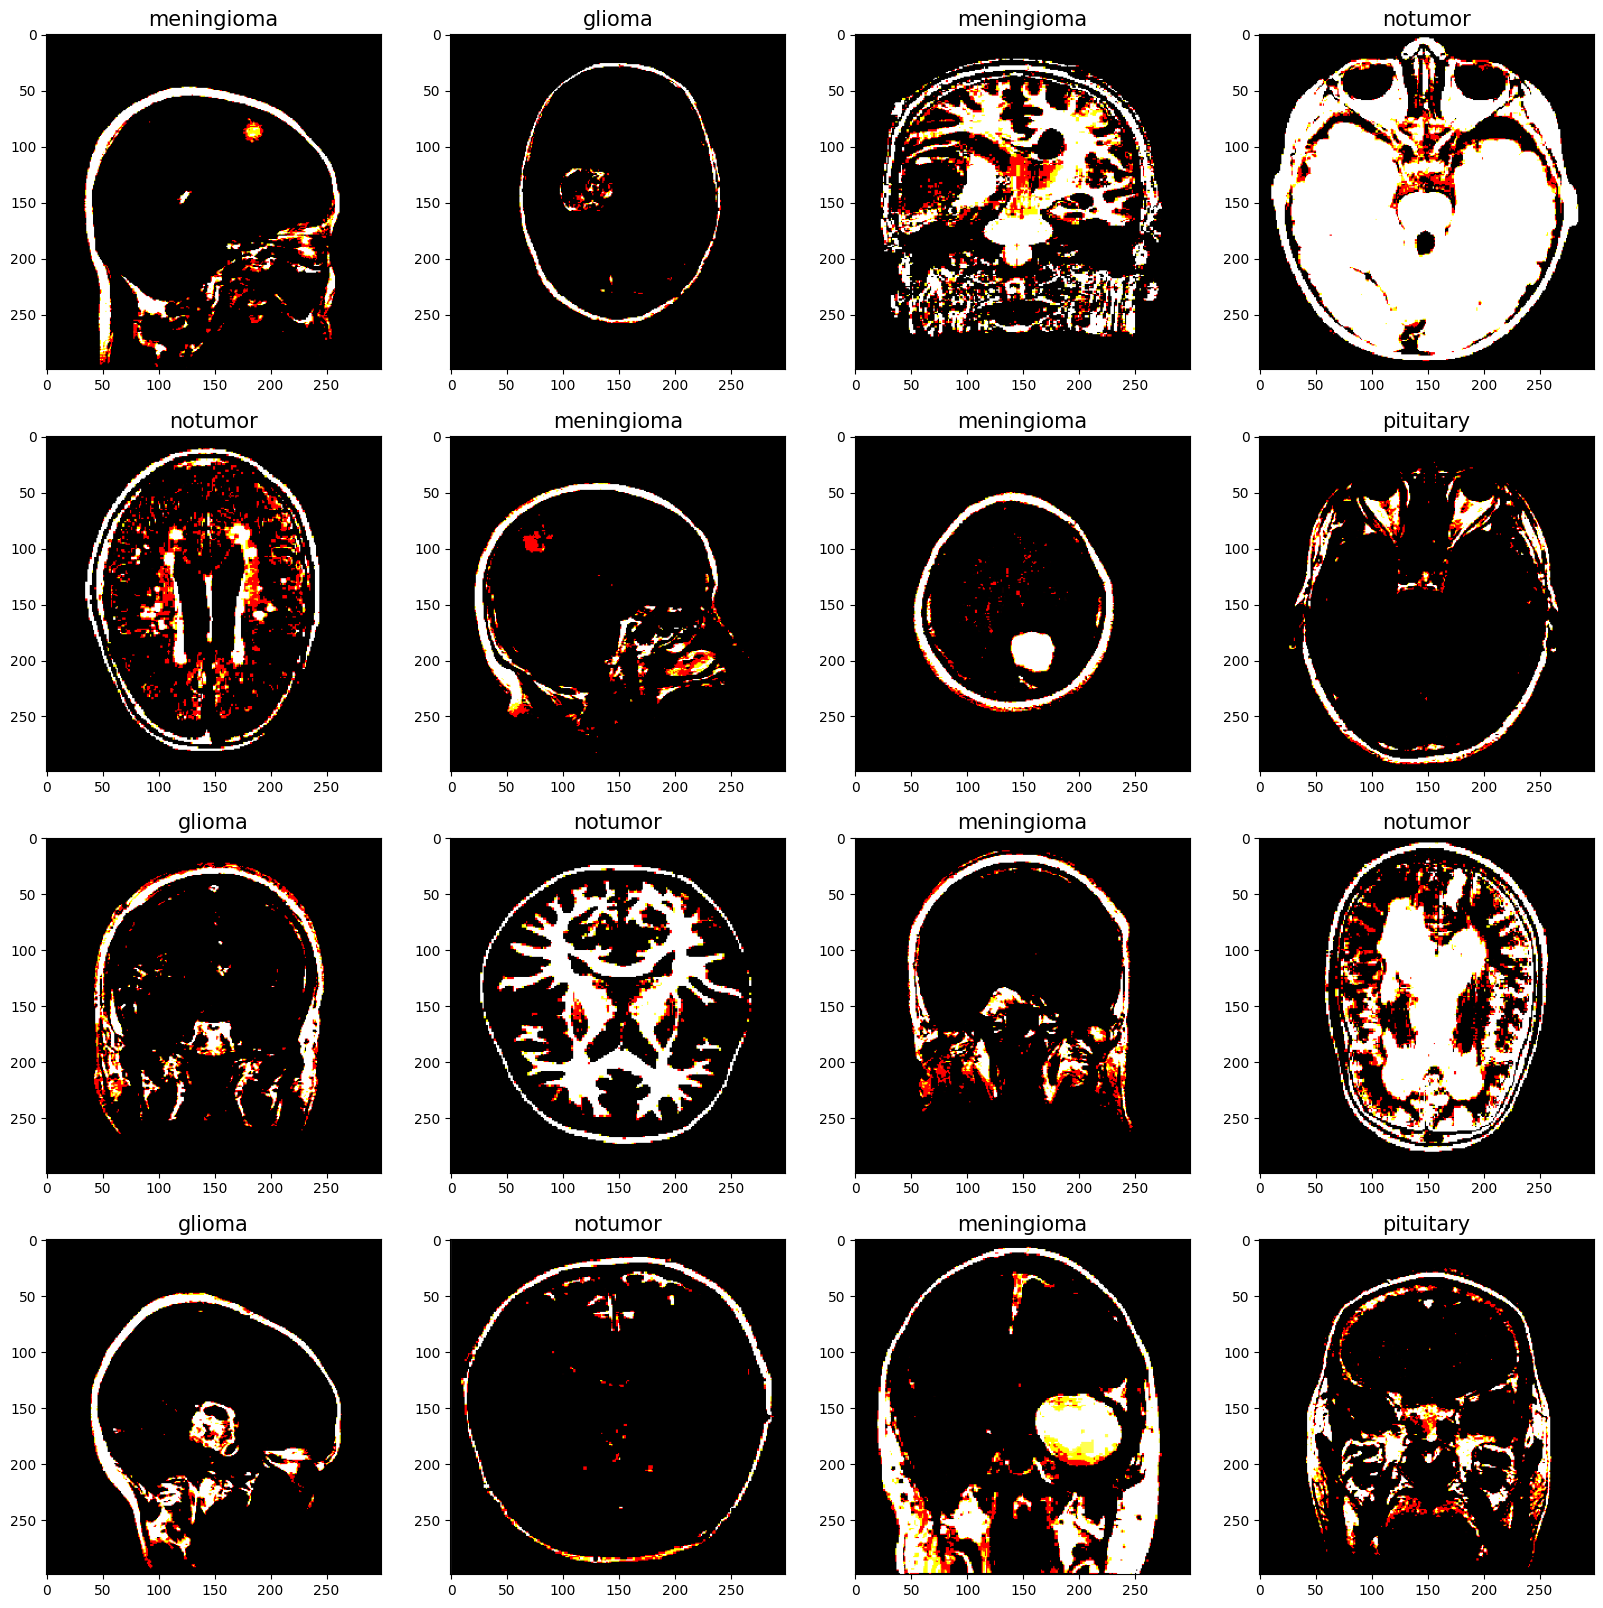

In [ ]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4,4, i + 1)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)

plt.show()

# Building Deep Learning Model

In [ ]:
img_shape = (299, 299, 3)

base_model = VGG19(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])

from tensorflow.keras.optimizers.schedules import ExponentialDecay

lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=1000,
    decay_rate=0.9
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

model.summary()


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 512)            │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,090,564 (76.64 MB)

 Trainable params: 20,090,564 (76.64 MB)

 Non-trainable params: 0 (0.00 B)

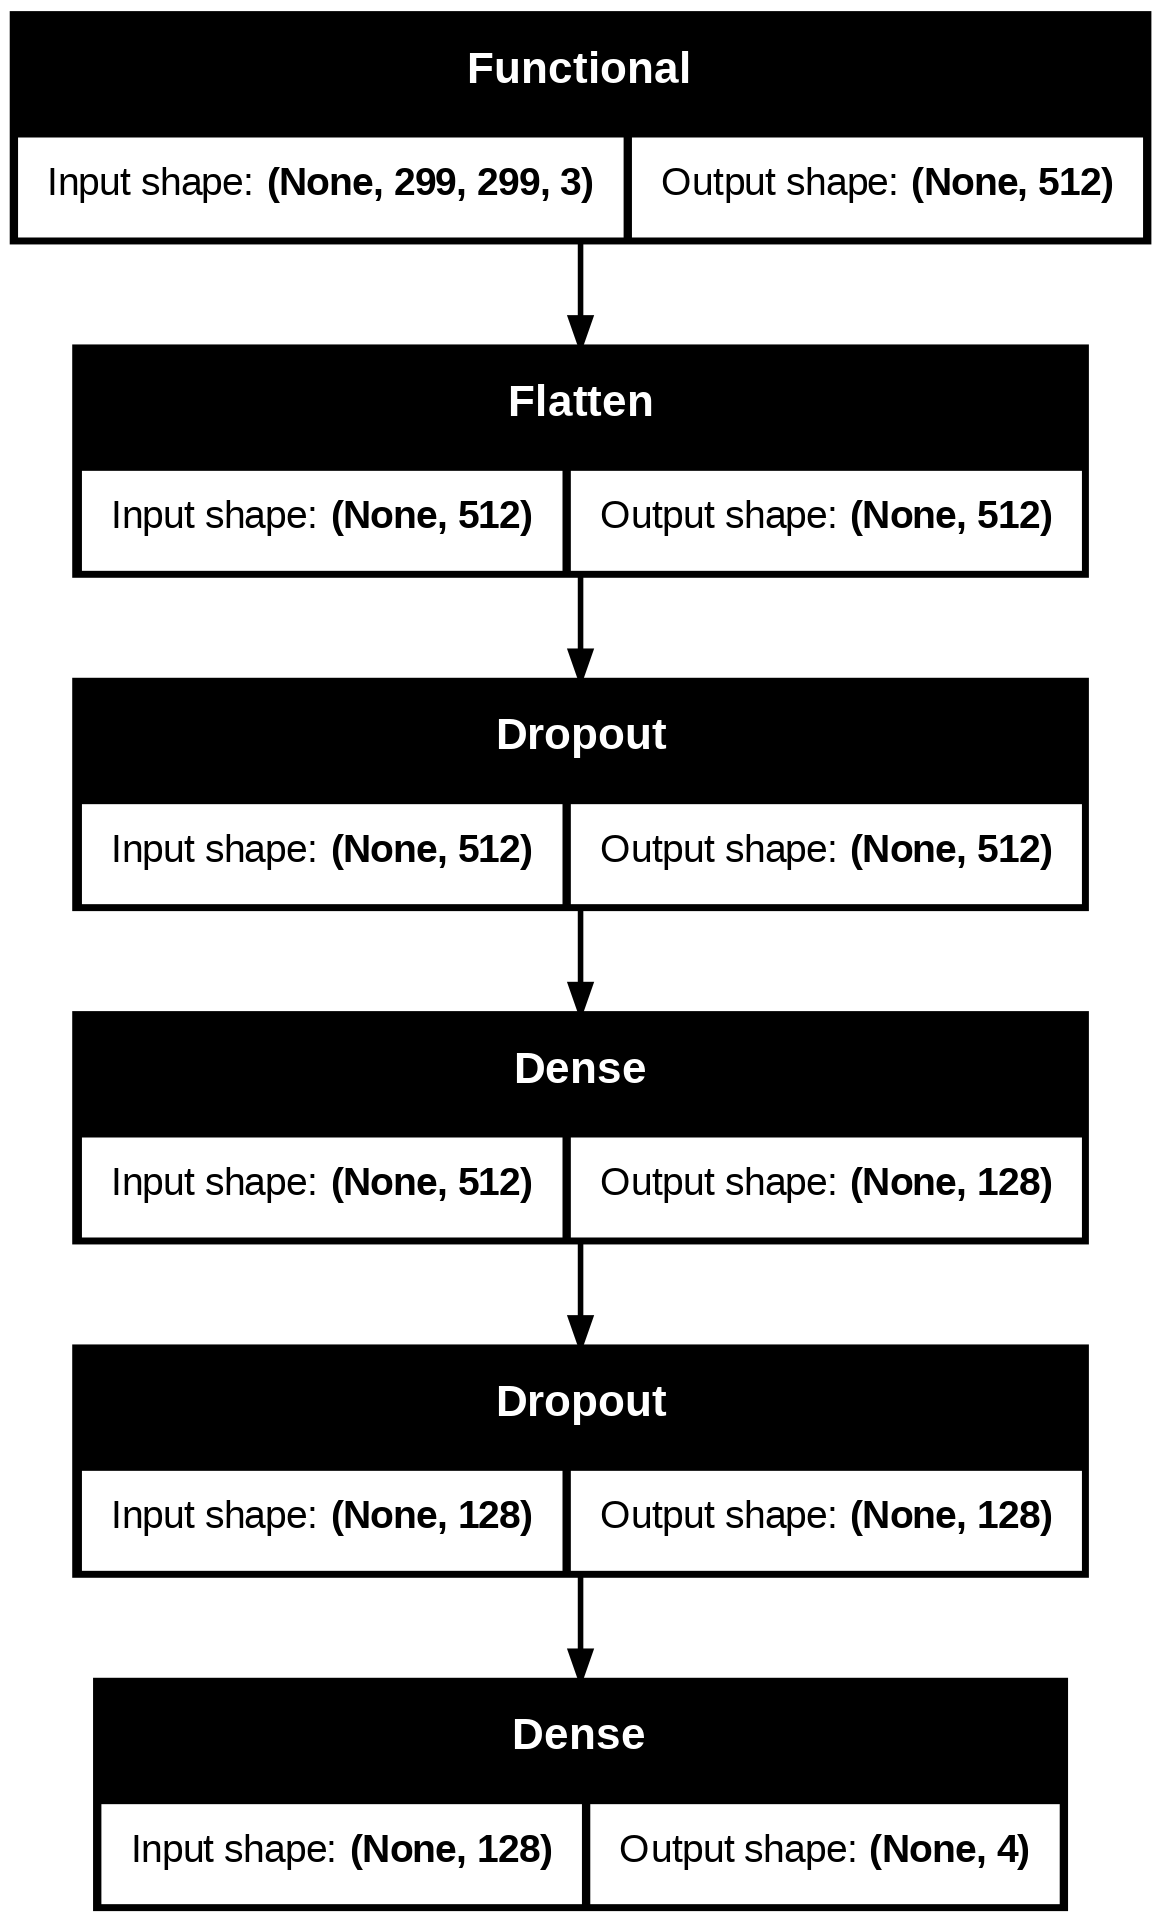

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

hist = model.fit(
    tr_gen,
    epochs=1000,
    validation_data=valid_gen,
    shuffle=False,
    callbacks=[early_stopping, checkpoint]
)



Epoch 1/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2839 - loss: 3.3271 - precision: 0.3135 - recall: 0.0666

179/179 ━━━━━━━━━━━━━━━━━━━━ 388s 2s/step - accuracy: 0.2840 - loss: 3.3183 - precision: 0.3140 - recall: 0.0665 - val_accuracy: 0.4229 - val_loss: 1.2336 - val_precision: 0.8644 - val_recall: 0.1557
Epoch 2/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4261 - loss: 1.2263 - precision: 0.8380 - recall: 0.1432

179/179 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.4262 - loss: 1.2260 - precision: 0.8381 - recall: 0.1434 - val_accuracy: 0.6305 - val_loss: 1.1139 - val_precision: 0.8858 - val_recall: 0.2962
Epoch 3/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5321 - loss: 1.0834 - precision: 0.8395 - recall: 0.2769

179/179 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.5321 - loss: 1.0834 - precision: 0.8395 - recall: 0.2769 - val_accuracy: 0.6443 - val_loss: 0.9146 - val_precision: 0.8581 - val_recall: 0.3786
Epoch 4/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.5256 - loss: 1.0248 - precision: 0.7992 - recall: 0.3052 - val_accuracy: 0.5496 - val_loss: 0.9838 - val_precision: 0.7481 - val_recall: 0.4397
Epoch 5/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6018 - loss: 0.9266 - precision: 0.7629 - recall: 0.3986

179/179 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.6019 - loss: 0.9264 - precision: 0.7628 - recall: 0.3989 - val_accuracy: 0.6748 - val_loss: 0.7232 - val_precision: 0.8206 - val_recall: 0.5099
Epoch 6/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6478 - loss: 0.8020 - precision: 0.7689 - recall: 0.5101

179/179 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.6479 - loss: 0.8019 - precision: 0.7689 - recall: 0.5102 - val_accuracy: 0.7450 - val_loss: 0.5920 - val_precision: 0.8007 - val_recall: 0.6870
Epoch 7/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6752 - loss: 0.7140 - precision: 0.7503 - recall: 0.5593

179/179 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.6753 - loss: 0.7139 - precision: 0.7504 - recall: 0.5594 - val_accuracy: 0.7435 - val_loss: 0.5695 - val_precision: 0.8105 - val_recall: 0.6595
Epoch 8/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7053 - loss: 0.6634 - precision: 0.7674 - recall: 0.6086

179/179 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.7053 - loss: 0.6635 - precision: 0.7674 - recall: 0.6085 - val_accuracy: 0.7588 - val_loss: 0.5579 - val_precision: 0.8310 - val_recall: 0.6458
Epoch 9/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7491 - loss: 0.5899 - precision: 0.7963 - recall: 0.6863

179/179 ━━━━━━━━━━━━━━━━━━━━ 236s 1s/step - accuracy: 0.7491 - loss: 0.5900 - precision: 0.7964 - recall: 0.6863 - val_accuracy: 0.7450 - val_loss: 0.5333 - val_precision: 0.7841 - val_recall: 0.7099
Epoch 10/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.7427 - loss: 0.6248 - precision: 0.7889 - recall: 0.6698 - val_accuracy: 0.8031 - val_loss: 0.5522 - val_precision: 0.8350 - val_recall: 0.7573
Epoch 11/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8101 - loss: 0.5059 - precision: 0.8422 - recall: 0.7516

179/179 ━━━━━━━━━━━━━━━━━━━━ 235s 1s/step - accuracy: 0.8101 - loss: 0.5056 - precision: 0.8422 - recall: 0.7518 - val_accuracy: 0.8397 - val_loss: 0.3834 - val_precision: 0.8479 - val_recall: 0.8168
Epoch 12/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8589 - loss: 0.3938 - precision: 0.8788 - recall: 0.8285

179/179 ━━━━━━━━━━━━━━━━━━━━ 247s 1s/step - accuracy: 0.8589 - loss: 0.3938 - precision: 0.8788 - recall: 0.8286 - val_accuracy: 0.9145 - val_loss: 0.2365 - val_precision: 0.9249 - val_recall: 0.9023
Epoch 13/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 242s 1s/step - accuracy: 0.8817 - loss: 0.3205 - precision: 0.9011 - recall: 0.8621 - val_accuracy: 0.9130 - val_loss: 0.2979 - val_precision: 0.9231 - val_recall: 0.8977
Epoch 14/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.9049 - loss: 0.2578 - precision: 0.9227 - recall: 0.8919 - val_accuracy: 0.8855 - val_loss: 0.3347 - val_precision: 0.8946 - val_recall: 0.8809
Epoch 15/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9100 - loss: 0.2531 - precision: 0.9272 - recall: 0.8887

179/179 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.9100 - loss: 0.2530 - precision: 0.9272 - recall: 0.8887 - val_accuracy: 0.9298 - val_loss: 0.2024 - val_precision: 0.9352 - val_recall: 0.9252
Epoch 16/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.9336 - loss: 0.1972 - precision: 0.9469 - recall: 0.9232 - val_accuracy: 0.9206 - val_loss: 0.2189 - val_precision: 0.9232 - val_recall: 0.9176
Epoch 17/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9410 - loss: 0.1810 - precision: 0.9507 - recall: 0.9285

179/179 ━━━━━━━━━━━━━━━━━━━━ 234s 1s/step - accuracy: 0.9410 - loss: 0.1810 - precision: 0.9507 - recall: 0.9285 - val_accuracy: 0.9176 - val_loss: 0.1922 - val_precision: 0.9300 - val_recall: 0.9130
Epoch 18/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.9435 - loss: 0.1572 - precision: 0.9530 - recall: 0.9387 - val_accuracy: 0.9237 - val_loss: 0.2687 - val_precision: 0.9287 - val_recall: 0.9145
Epoch 19/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9578 - loss: 0.1247 - precision: 0.9638 - recall: 0.9523

179/179 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.9577 - loss: 0.1248 - precision: 0.9638 - recall: 0.9523 - val_accuracy: 0.9573 - val_loss: 0.1358 - val_precision: 0.9630 - val_recall: 0.9542
Epoch 20/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9534 - loss: 0.1418 - precision: 0.9627 - recall: 0.9491

179/179 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.9534 - loss: 0.1418 - precision: 0.9627 - recall: 0.9491 - val_accuracy: 0.9695 - val_loss: 0.1022 - val_precision: 0.9724 - val_recall: 0.9679
Epoch 21/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.9605 - loss: 0.1152 - precision: 0.9653 - recall: 0.9533 - val_accuracy: 0.9603 - val_loss: 0.1510 - val_precision: 0.9632 - val_recall: 0.9588
Epoch 22/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.9650 - loss: 0.1131 - precision: 0.9701 - recall: 0.9604 - val_accuracy: 0.9496 - val_loss: 0.1897 - val_precision: 0.9523 - val_recall: 0.9450
Epoch 23/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9674 - loss: 0.1001 - precision: 0.9728 - recall: 0.9646

179/179 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - accuracy: 0.9674 - loss: 0.1001 - precision: 0.9728 - recall: 0.9646 - val_accuracy: 0.9725 - val_loss: 0.1005 - val_precision: 0.9740 - val_recall: 0.9725
Epoch 24/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9640 - loss: 0.1099 - precision: 0.9677 - recall: 0.9568

179/179 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - accuracy: 0.9640 - loss: 0.1099 - precision: 0.9677 - recall: 0.9569 - val_accuracy: 0.9756 - val_loss: 0.0929 - val_precision: 0.9770 - val_recall: 0.9740
Epoch 25/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.9691 - loss: 0.0887 - precision: 0.9733 - recall: 0.9669 - val_accuracy: 0.9435 - val_loss: 0.1855 - val_precision: 0.9462 - val_recall: 0.9389
Epoch 26/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9786 - loss: 0.0765 - precision: 0.9804 - recall: 0.9739

179/179 ━━━━━━━━━━━━━━━━━━━━ 235s 1s/step - accuracy: 0.9786 - loss: 0.0764 - precision: 0.9804 - recall: 0.9739 - val_accuracy: 0.9756 - val_loss: 0.0730 - val_precision: 0.9755 - val_recall: 0.9740
Epoch 27/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.9714 - loss: 0.0862 - precision: 0.9756 - recall: 0.9669 - val_accuracy: 0.9405 - val_loss: 0.1761 - val_precision: 0.9520 - val_recall: 0.9389
Epoch 28/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.9732 - loss: 0.0784 - precision: 0.9784 - recall: 0.9710 - val_accuracy: 0.9771 - val_loss: 0.0748 - val_precision: 0.9786 - val_recall: 0.9771
Epoch 29/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.9865 - loss: 0.0489 - precision: 0.9871 - recall: 0.9857 - val_accuracy: 0.9878 - val_loss: 0.0764 - val_precision: 0.9878 - val_recall: 0.9863
Epoch 30/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9830 - loss: 0.0596 - precision: 0.9849 - recall: 0.9812

179/179 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - accuracy: 0.9830 - loss: 0.0597 - precision: 0.9848 - recall: 0.9812 - val_accuracy: 0.9817 - val_loss: 0.0548 - val_precision: 0.9832 - val_recall: 0.9802
Epoch 31/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 253s 1s/step - accuracy: 0.9858 - loss: 0.0472 - precision: 0.9871 - recall: 0.9836 - val_accuracy: 0.9634 - val_loss: 0.1338 - val_precision: 0.9634 - val_recall: 0.9634
Epoch 32/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9755 - loss: 0.0700 - precision: 0.9800 - recall: 0.9734

179/179 ━━━━━━━━━━━━━━━━━━━━ 236s 1s/step - accuracy: 0.9755 - loss: 0.0699 - precision: 0.9800 - recall: 0.9735 - val_accuracy: 0.9847 - val_loss: 0.0548 - val_precision: 0.9847 - val_recall: 0.9847
Epoch 33/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9854 - loss: 0.0506 - precision: 0.9867 - recall: 0.9834

179/179 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.9854 - loss: 0.0507 - precision: 0.9867 - recall: 0.9834 - val_accuracy: 0.9924 - val_loss: 0.0307 - val_precision: 0.9924 - val_recall: 0.9924
Epoch 34/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.9885 - loss: 0.0334 - precision: 0.9902 - recall: 0.9873 - val_accuracy: 0.9863 - val_loss: 0.0647 - val_precision: 0.9862 - val_recall: 0.9847
Epoch 35/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.9878 - loss: 0.0374 - precision: 0.9899 - recall: 0.9871 - val_accuracy: 0.9893 - val_loss: 0.0575 - val_precision: 0.9908 - val_recall: 0.9893
Epoch 36/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.9876 - loss: 0.0394 - precision: 0.9881 - recall: 0.9858 - val_accuracy: 0.9817 - val_loss: 0.1259 - val_precision: 0.9817 - val_recall: 0.9817
Epoch 37/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.9868 - loss: 0.0492 - precision: 0.9871 - recall: 0.9852 - val_accuracy: 0.9817 - val_lo

# Visualize model performance

In [ ]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])

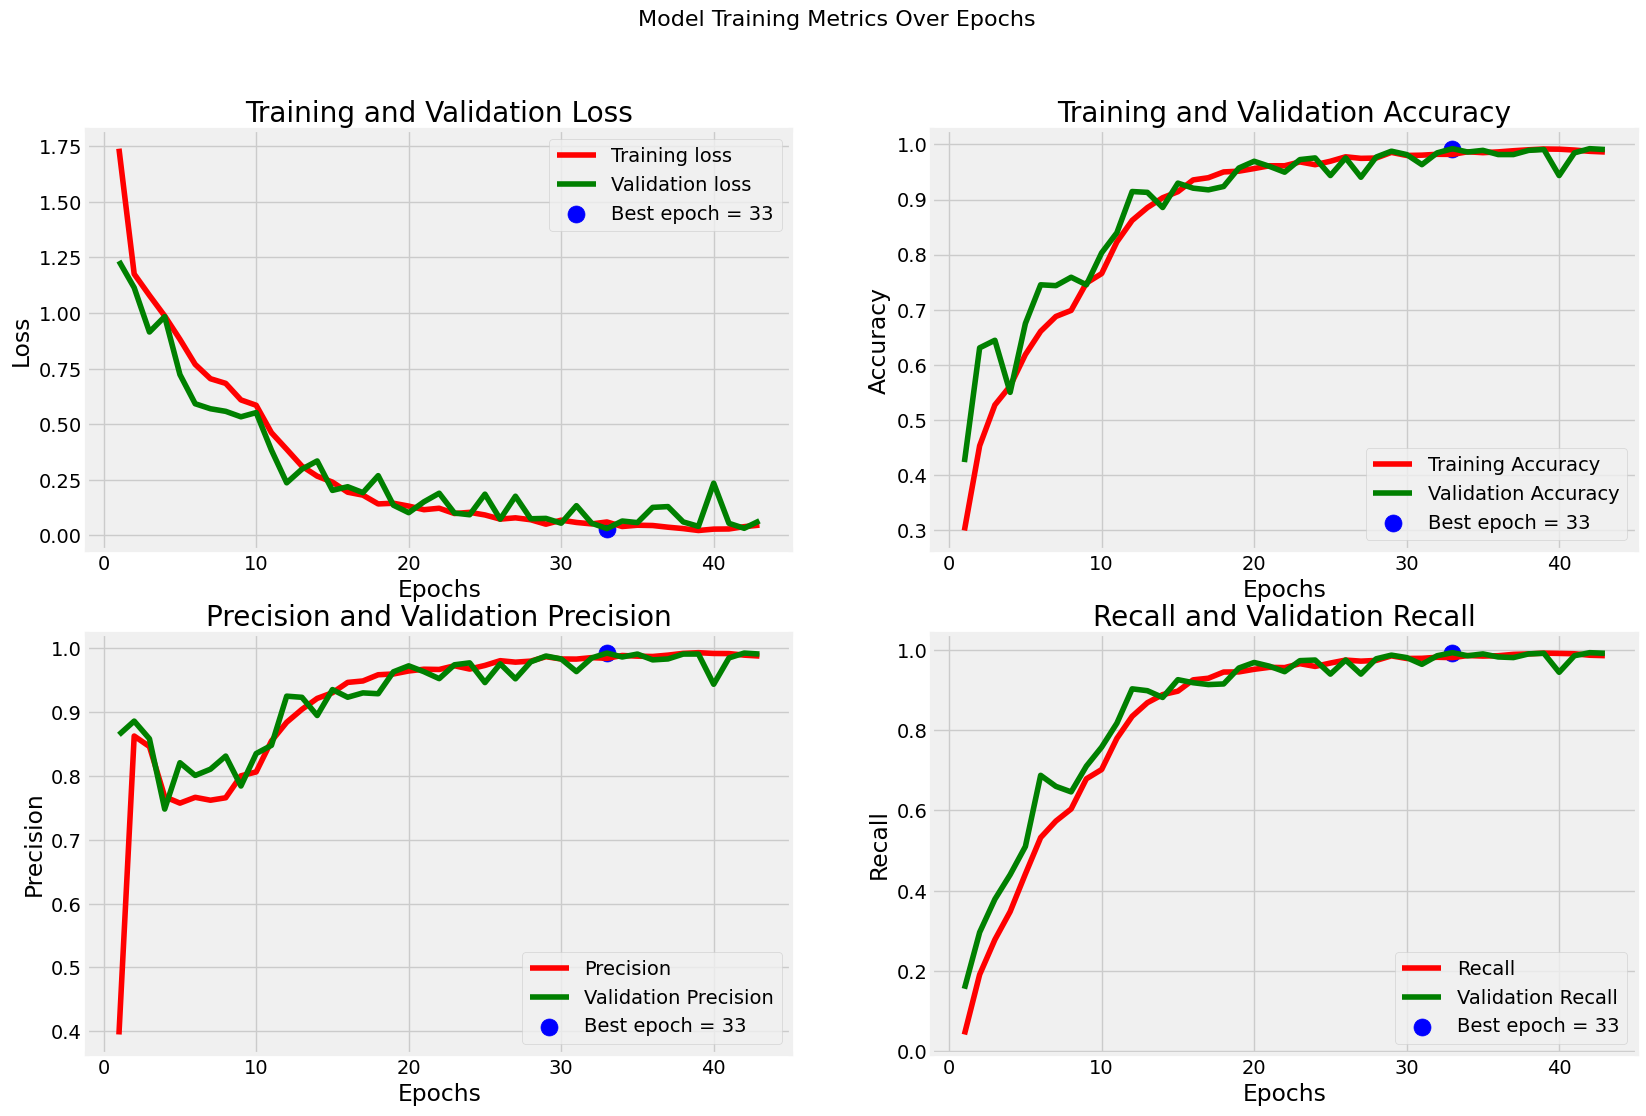

In [ ]:
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_per = hist.history['precision']
tr_recall = hist.history['recall']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_per = hist.history['val_precision']
val_recall = hist.history['val_recall']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precision')
plt.plot(Epochs, val_per, 'g', label='Validation Precision')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precision and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recall')
plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recall and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


# Model Evaluation

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

# the test_score[0] = loss, test_score[1] = accuracy, test_score[2] = precision, test_score[3] = recall
print(test_score)

179/179 ━━━━━━━━━━━━━━━━━━━━ 186s 1s/step - accuracy: 0.9953 - loss: 0.0180 - precision: 0.9964 - recall: 0.9949
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 448ms/step - accuracy: 0.9988 - loss: 0.0089 - precision: 0.9988 - recall: 0.9988
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 244ms/step - accuracy: 0.9911 - loss: 0.0316 - precision: 0.9911 - recall: 0.9911
Train Loss: 0.0170
Train Accuracy: 99.54%
--------------------
Validation Loss: 0.0307
Validation Accuracy: 99.24%
--------------------
Test Loss: 0.0382
Test Accuracy: 99.24%
[0.038205668330192566, 0.9923780560493469, 0.9923780560493469, 0.9923780560493469]


In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 237ms/step


# Plotting Confusuion Matrix

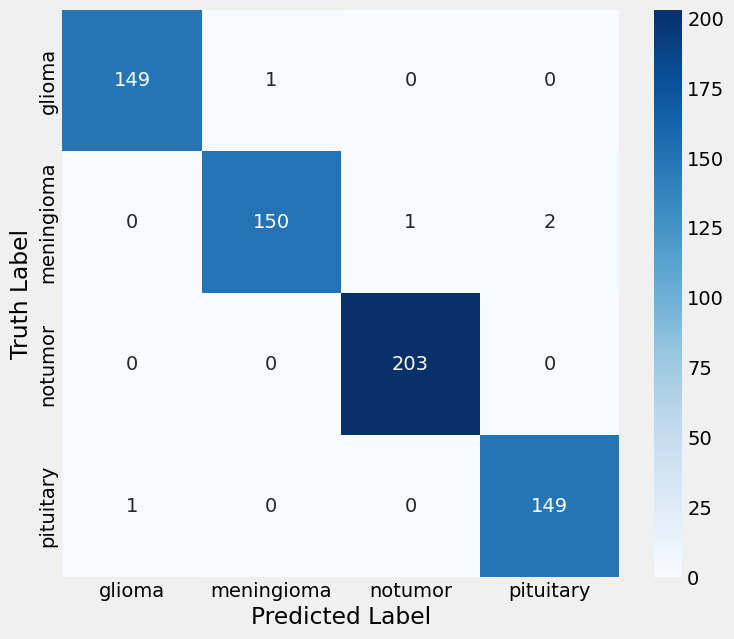

In [ ]:
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

# Classification Report

In [ ]:
report = classification_report(ts_gen.classes, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       150
           1       0.99      0.98      0.99       153
           2       1.00      1.00      1.00       203
           3       0.99      0.99      0.99       150

    accuracy                           0.99       656
   macro avg       0.99      0.99      0.99       656
weighted avg       0.99      0.99      0.99       656



# Testing

In [ ]:
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# prediction function
def predict(img_path):
    label = list(class_dict.keys())

    # Load and preprocess the image
    img = Image.open(img_path)
    img = img.resize((299, 299))
    img_array = np.array(img)

    # Ensuring the image has 3 channels (RGB)
    if img_array.ndim == 2:
        img_array = np.stack((img_array,) * 3, axis=-1)

    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Predict the class
    predictions = model.predict(img_array)

    # probabilities and labels
    probs = predictions[0]
    predicted_class_idx = np.argmax(probs)
    predicted_class = label[predicted_class_idx]

    # Plot the image and prediction
    plt.figure(figsize=(12, 12))
    plt.subplot(2, 1, 1)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}", fontsize=15)

    plt.subplot(2, 1, 2)
    bars = plt.barh(label, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt='%.2f')

    plt.show()

# Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


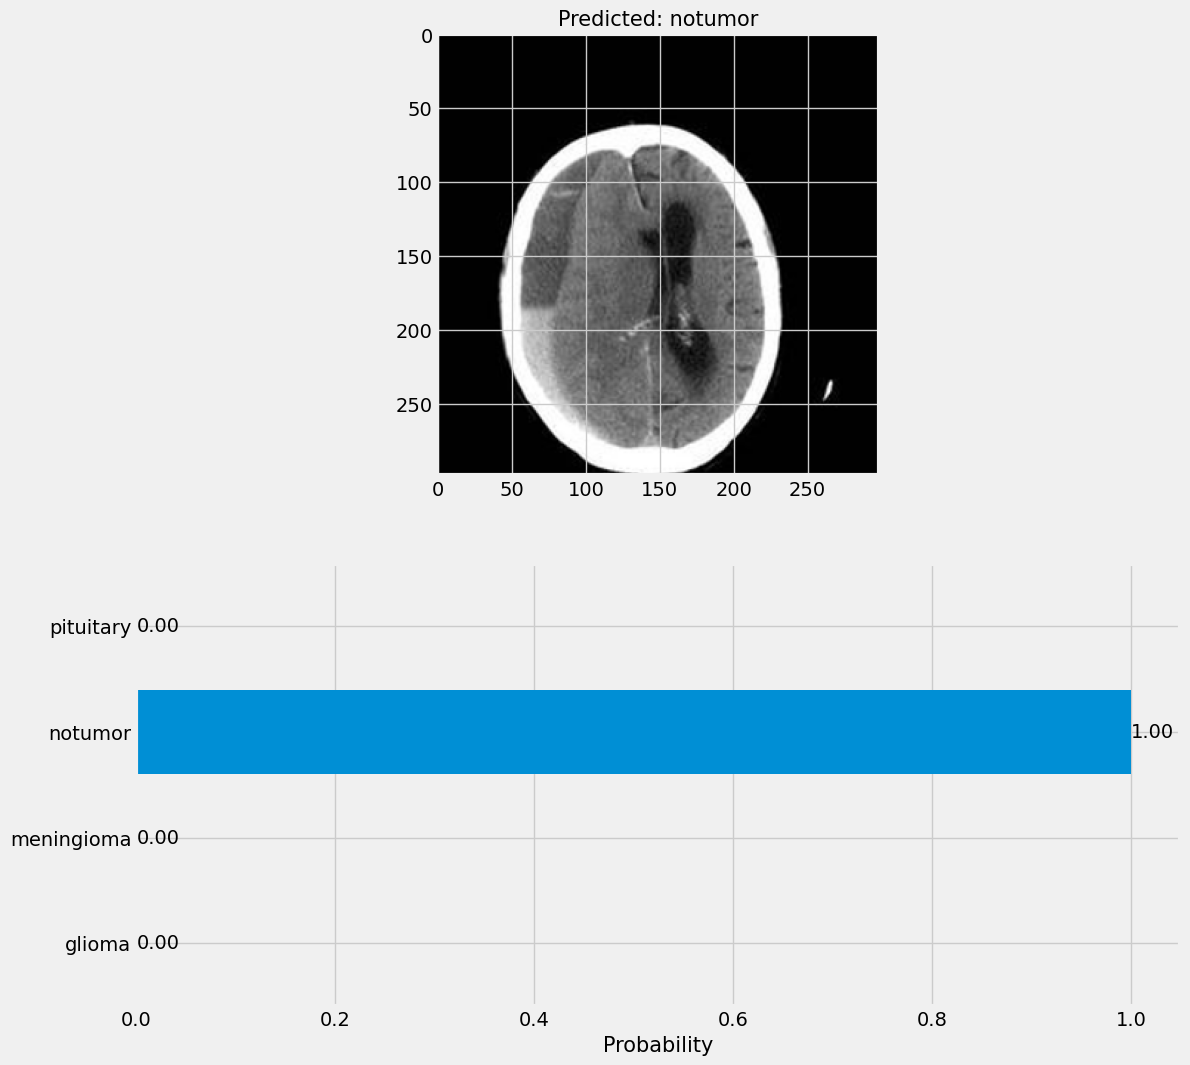

In [ ]:
predict('/content/Testing/notumor/Te-noTr_0000.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


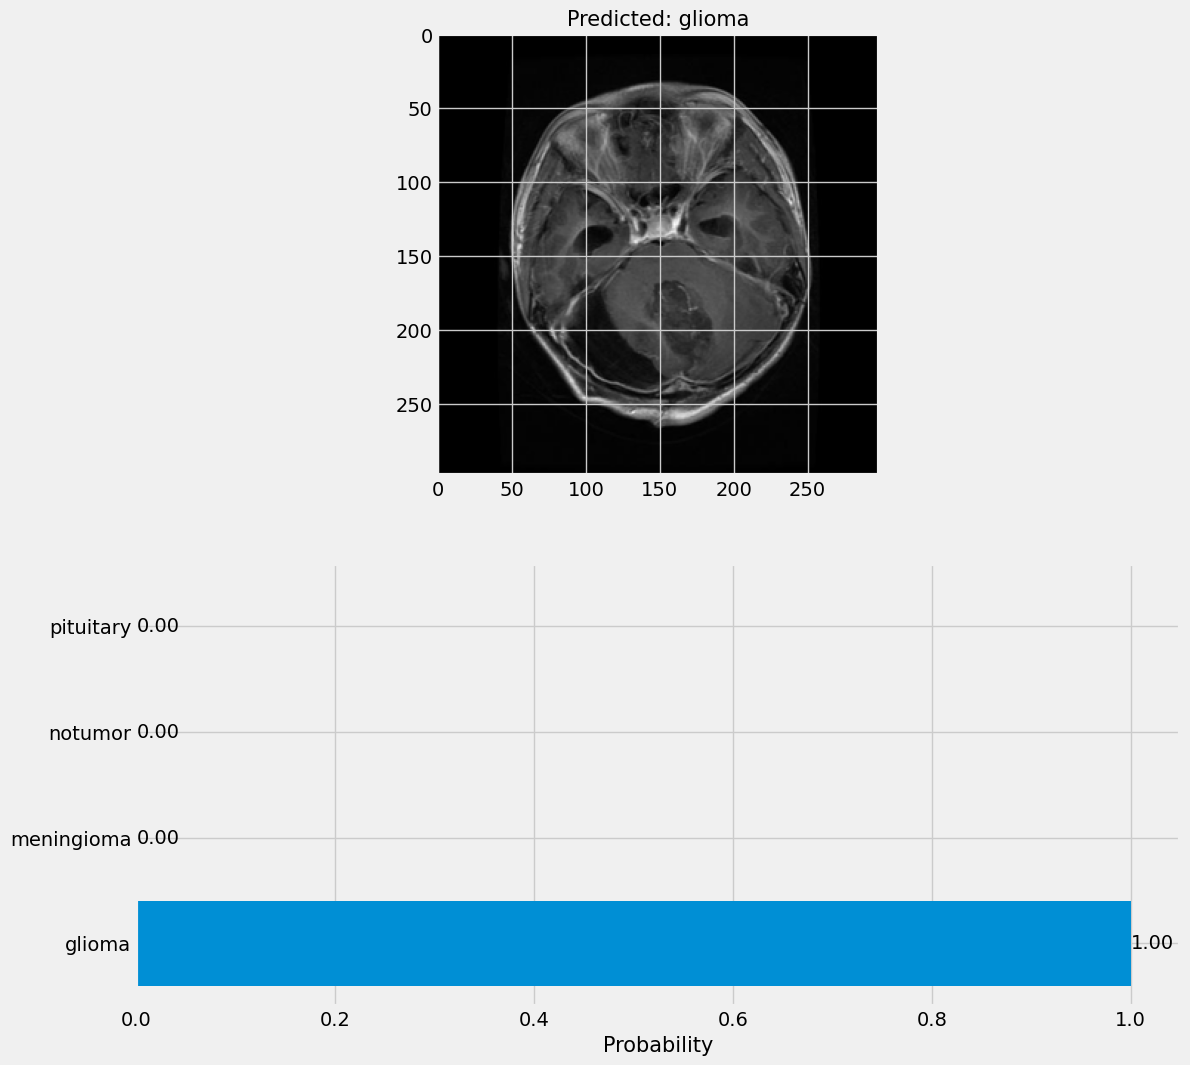

In [ ]:
predict('/content/Testing/glioma/Te-glTr_0000.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


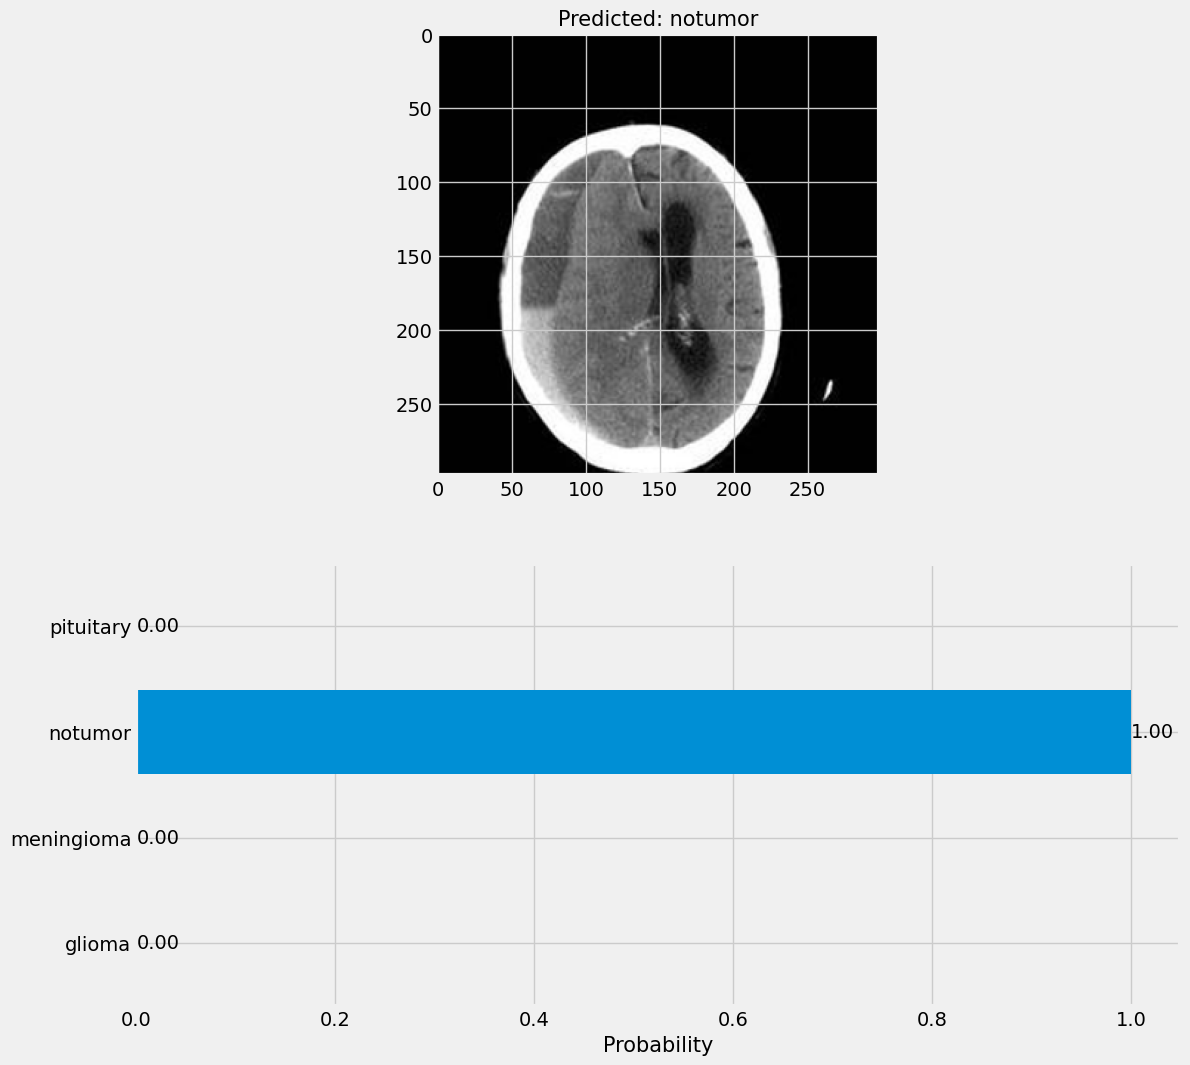

In [ ]:
predict('/content/Testing/notumor/Te-noTr_0000.jpg')